In [42]:
### DIFFERENCE BETWEEN AREAS 

In [2]:
##### MERKEZ AND KARACAHASIR 
import geopandas as gpd
import pandas as pd

gdf_shp = gpd.read_file("/home/polivera/Documents/NERO - Database/Turkiye/Mugla_Merkez/progression_mugla_merkez_02082021.shp")


gdf_json = gpd.read_file("/home/polivera/Documents/NERO - Database/Clear GeoJSONs/turkey_202108_merkez_v1.geojson")

# Convertir ambos atributos a datetime
gdf_shp['date_hour'] = pd.to_datetime(gdf_shp['date_hour'])
gdf_json['iso_timestamp'] = pd.to_datetime(gdf_json['iso_timestamp'])

# Seleccionar columnas relevantes
df_shp = gdf_shp[['date_hour', 'Area_QGIS']]
df_json = gdf_json[['iso_timestamp', 'area_ha']]

# Agrupar áreas por fecha/hora y sumar los valores
df_shp_grouped = df_shp.groupby('date_hour', as_index=False)['Area_QGIS'].sum()
df_json_grouped = df_json.groupby('iso_timestamp', as_index=False)['area_ha'].sum()

# Realizar el merge por la columna de fecha/hora
df_merged = pd.merge(
    df_shp_grouped,
    df_json_grouped,
    left_on='date_hour',
    right_on='iso_timestamp',
    how='inner'
)

# Ahora puedes calcular la diferencia y la media de diferencias
df_merged['diferencia'] = df_merged['Area_QGIS'] - df_merged['area_ha']
media_diferencias = df_merged['diferencia'].mean()
print("Media de diferencias:", media_diferencias)



Media de diferencias: -8714.329628912954


/tmp/ipykernel_1568794/208217379.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shp['Area_QGIS'] = df_shp['Area_QGIS'].astype(str).str.replace(',', '.').astype(float)
/tmp/ipykernel_1568794/208217379.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_json['area_ha'] = df_json['area_ha'].astype(str).str.replace(',', '.').astype(float)


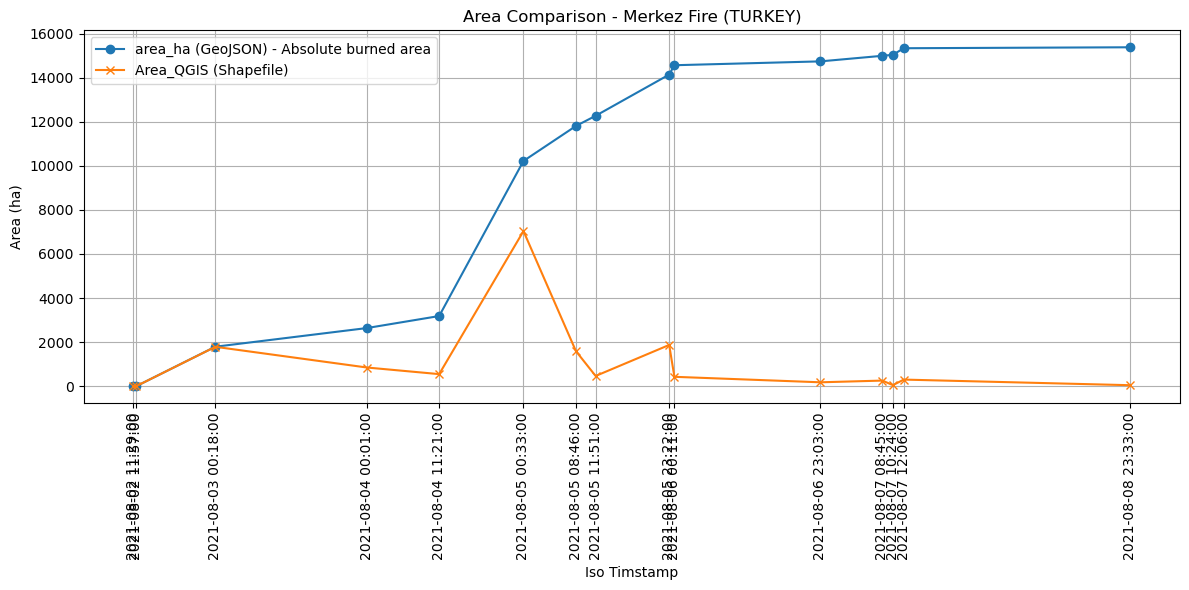

In [7]:
### MERKEZ AND KARACAHASIR 

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Reemplaza las comas por puntos y convierte a float
df_shp['Area_QGIS'] = df_shp['Area_QGIS'].astype(str).str.replace(',', '.').astype(float)
df_json['area_ha'] = df_json['area_ha'].astype(str).str.replace(',', '.').astype(float)

# Agrupar áreas por fecha/hora y sumar los valores
df_shp_grouped = df_shp.groupby('date_hour', as_index=False)['Area_QGIS'].sum()
df_json_grouped = df_json.groupby('iso_timestamp', as_index=False)['area_ha'].sum()


# Realizar el merge por la columna de fecha/hora
df_merged = pd.merge(
    df_shp_grouped,
    df_json_grouped,
    left_on='date_hour',
    right_on='iso_timestamp',
    how='outer'
)
# Convierte 'date_hour' a datetime y elimina valores nulos SOLO si quieres graficar todos los puntos; si no, los tickets pueden faltar
df_merged['date_hour'] = pd.to_datetime(df_merged['date_hour'], errors='coerce')
df_merged = df_merged.sort_values(by='date_hour')



plt.figure(figsize=(12,6))

import matplotlib.dates as mdates

# Convierte 'date_hour' a datetime si no lo has hecho antes
df_merged['date_hour'] = pd.to_datetime(df_merged['date_hour'], errors='coerce')

plt.plot(df_merged['date_hour'], df_merged['area_ha'], marker='o', label='area_ha (GeoJSON) - Absolute burned area')
plt.plot(df_merged['date_hour'], df_merged['Area_QGIS'], marker='x', label='Area_QGIS (Shapefile)')

plt.xlabel('Iso Timstamp')
plt.ylabel('Area (ha)')
plt.title('Area Comparison - Merkez Fire (TURKEY)')
plt.legend()
plt.grid()



# Fuerza los ticks en cada fecha de tus datos
plt.xticks(df_merged['date_hour'], df_merged['date_hour'].dt.strftime('%Y-%m-%d %H:%M:%S'), rotation=90)

plt.tight_layout()
plt.show()



In [16]:
## MASSAROSA
import geopandas as gpd
import pandas as pd

gdf_shp = gpd.read_file("/home/polivera/Documents/NERO - Database/Italy/Massarosa_2022/mifle.shp")
gdf_json = gpd.read_file("/home/polivera/Documents/NERO - Database/Reviews GeoJSONs/MassarosaFire_new1.geojson")


# Convert to string 
gdf_shp['Name'] = gdf_shp['Name'].astype(str)
gdf_json['iso_timestamp'] = gdf_json['iso_timestamp'].astype(str)

# Get attributes with and without "Finale"
df_shp_finale = gdf_shp[gdf_shp['Name'] == 'Finale'][['Name', 'Area_QGIS']]
df_json_finale = gdf_json[gdf_json['iso_timestamp'] == 'Finale'][['iso_timestamp', 'area_ha']]

df_shp_fecha = gdf_shp[gdf_shp['Name'] != 'Finale'].copy()
df_json_fecha = gdf_json[gdf_json['iso_timestamp'] != 'Finale'].copy()

# Convert dates and ignore errors
df_shp_fecha['Name'] = pd.to_datetime(df_shp_fecha['Name'], errors='coerce')
df_json_fecha['iso_timestamp'] = pd.to_datetime(df_json_fecha['iso_timestamp'], errors='coerce')

# Grup date values
df_shp_grouped = df_shp_fecha.groupby('Name', as_index=False)['Area_QGIS'].sum()
df_json_grouped = df_json_fecha.groupby('iso_timestamp', as_index=False)['area_ha'].sum()

# Add the "Finale" values
shp_finale_sum = df_shp_finale['Area_QGIS'].sum()
json_finale_sum = df_json_finale['area_ha'].sum()

if shp_finale_sum > 0:
    df_shp_grouped = pd.concat([df_shp_grouped, pd.DataFrame({'Name': ['Finale'], 'Area_QGIS': [shp_finale_sum]})], ignore_index=True)

if json_finale_sum > 0:
    df_json_grouped = pd.concat([df_json_grouped, pd.DataFrame({'iso_timestamp': ['Finale'], 'area_ha': [json_finale_sum]})], ignore_index=True)

# Merge for dates
df_merged = pd.merge(
    df_shp_grouped,
    df_json_grouped,
    left_on='Name',
    right_on='iso_timestamp',
    how='inner'
)

# Calculate difference mean
df_merged['diference'] = df_merged['Area_QGIS'] - df_merged['area_ha']
media_diferencias = df_merged['diference'].mean()
print("Difference mean:", media_diferencias)

Difference mean: 0.15863042837075533


/tmp/ipykernel_1280433/2604672463.py:21: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_shp_fecha['Name'] = pd.to_datetime(df_shp_fecha['Name'], errors='coerce')
/tmp/ipykernel_1280433/2604672463.py:22: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_json_fecha['iso_timestamp'] = pd.to_datetime(df_json_fecha['iso_timestamp'], errors='coerce')


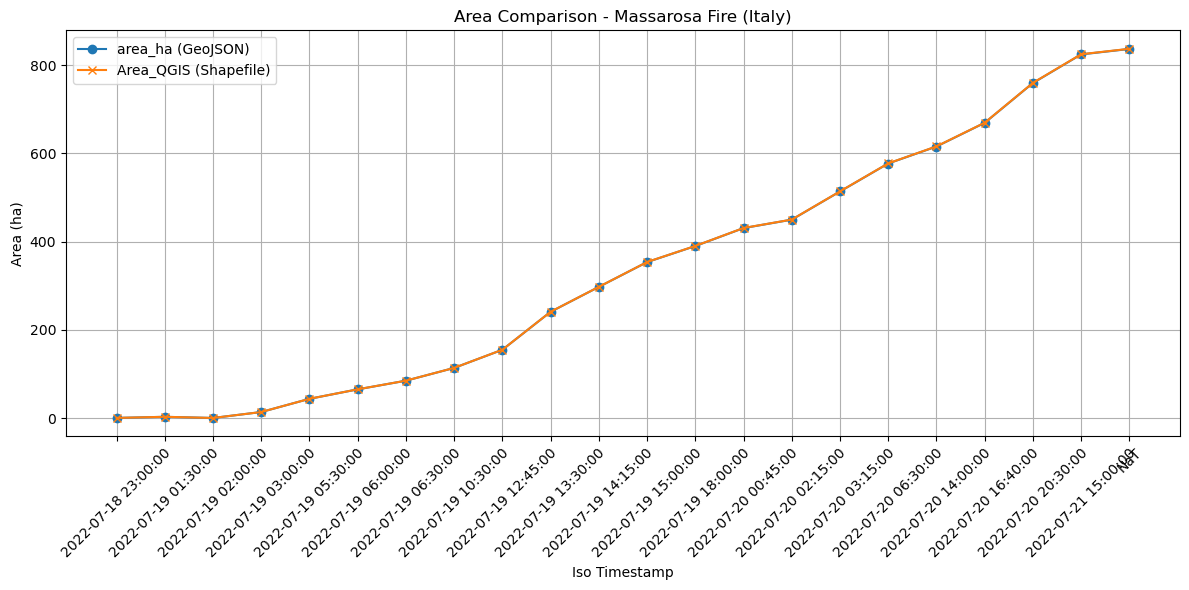

In [18]:
import matplotlib.pyplot as plt

# Replace comas "," to dots "."
df_shp_grouped['Area_QGIS'] = df_shp_grouped['Area_QGIS'].astype(str).str.replace(',', '.').astype(float)
df_json_grouped['area_ha'] = df_json_grouped['area_ha'].astype(str).str.replace(',', '.').astype(float)

# Crear una columna auxiliar para ordenar (Fechas normales primero, 'Finale' al final)
def sort_helper(x):
    if x == 'Finale':
        return pd.Timestamp.max
    else:
        return x

df_merged['sort_key'] = df_merged['Name'].apply(sort_helper)

# Ordenar por la columna auxiliar
df_merged = df_merged.sort_values(by='sort_key')

# Eliminar la columna auxiliar para limpieza
df_merged = df_merged.drop(columns=['sort_key'])


# Ordenar por 'Name' para mantener el orden lógico
#df_merged = df_merged.sort_values(by='Name')

plt.figure(figsize=(12,6))

# Posiciones equiespaciadas para eje X
posiciones = list(range(len(df_merged)))

plt.plot(posiciones, df_merged['area_ha'], marker='o', label='area_ha (GeoJSON)')
plt.plot(posiciones, df_merged['Area_QGIS'], marker='x', label='Area_QGIS (Shapefile)')

plt.xlabel('Iso Timestamp')
plt.ylabel('Area (ha)')
plt.title('Area Comparison - Massarosa Fire (Italy)')
plt.legend()
plt.grid()

# Usar etiquetas completas como string para eje X
fechas = df_merged['Name'].astype(str).tolist()
plt.xticks(ticks=posiciones, labels=fechas, rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import geopandas as gpd

### CALCI

# Leer archivos
gdf_shp= gpd.read_file('/home/polivera/Documents/NERO - Database/Italy/Calci_2018/Evoluzione Perimetro Incendio Monte Serra 24 set 2018_00.kml', driver='KML')
gdf_json = gpd.read_file("/home/polivera/Documents/NERO - Database/Reviews GeoJSONs/CalciFire_new2.geojson")
print(gdf_shp.columns)


# Función para extraer iso_timestamp desde 'Name' en KML
def extract_iso_timestamp(name):
    m = re.search(r'(\d{4})(\d{2})(\d{2})_(\d{2})(\d{2})', str(name))
    if m:
        return f"{m.group(1)}-{m.group(2)}-{m.group(3)} {m.group(4)}:{m.group(5)}"
    else:
        return None

gdf_shp['iso_timestamp'] = gdf_shp['Name'].apply(extract_iso_timestamp)
gdf_shp['iso_timestamp'] = pd.to_datetime(gdf_shp['iso_timestamp'], errors='coerce')
gdf_json['iso_timestamp'] = pd.to_datetime(gdf_json['iso_timestamp'], errors='coerce')

# Convierte áreas a float y reemplaza comas en ambos datasets
gdf_shp['Area_QGIS'] = gdf_shp['Area_QGIS'].astype(str).str.replace(',', '.').astype(float)
gdf_json['area_ha'] = gdf_json['area_ha'].astype(str).str.replace(',', '.').astype(float)

# Filtra filas con fechas válidas
df_shp = gdf_shp.dropna(subset=['iso_timestamp'])
df_json = gdf_json.dropna(subset=['iso_timestamp'])

# Agrupar por fecha tomando sumas
df_shp_grouped = df_shp.groupby('iso_timestamp', as_index=False)['Area_QGIS'].sum()
df_json_grouped = df_json.groupby('iso_timestamp', as_index=False)['area_ha'].sum()

# Realizar merge por la columna iso_timestamp
df_merged = pd.merge(df_shp_grouped, df_json_grouped, on='iso_timestamp', how='inner')

# Calcular diferencia y media
df_merged['diferencia'] = df_merged['Area_QGIS'] - df_merged['area_ha']
media_diferencias = df_merged['diferencia'].mean()
print("Media de diferencias:", media_diferencias)

# Ordena por fecha
df_merged = df_merged.sort_values(by='iso_timestamp')

# Graficar
plt.figure(figsize=(12,6))
posiciones = list(range(len(df_merged)))

plt.plot(posiciones, df_merged['area_ha'], marker='o', label='area_ha (GeoJSON)')
plt.plot(posiciones, df_merged['Area_QGIS'], marker='x', label='Area_QGIS (KML)')

plt.xlabel('Iso Timestamp')
plt.ylabel('Area (ha)')
plt.title('Area Comparison - Calci Fire (ITALY)')
plt.legend()
plt.grid()

fechas = df_merged['iso_timestamp'].dt.strftime('%Y-%m-%d %H:%M').tolist()
plt.xticks(ticks=posiciones, labels=fechas, rotation=45)

plt.tight_layout()
plt.show()


Index(['id', 'Name', 'description', 'timestamp', 'begin', 'end',
       'altitudeMode', 'tessellate', 'extrude', 'visibility', 'drawOrder',
       'icon', 'snippet', 'geometry'],
      dtype='object')


KeyError: 'Area_QGIS'

Mean difference -8316.796434665373


/tmp/ipykernel_1280433/2199480630.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shp['Area_QGIS'] = df_shp['Area_QGIS'].astype(str).str.replace(',', '.').astype(float)
/tmp/ipykernel_1280433/2199480630.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_json['area_ha'] = df_json['area_ha'].astype(str).str.replace(',', '.').astype(float)
/tmp/ipykernel_1280433/2199480630.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure

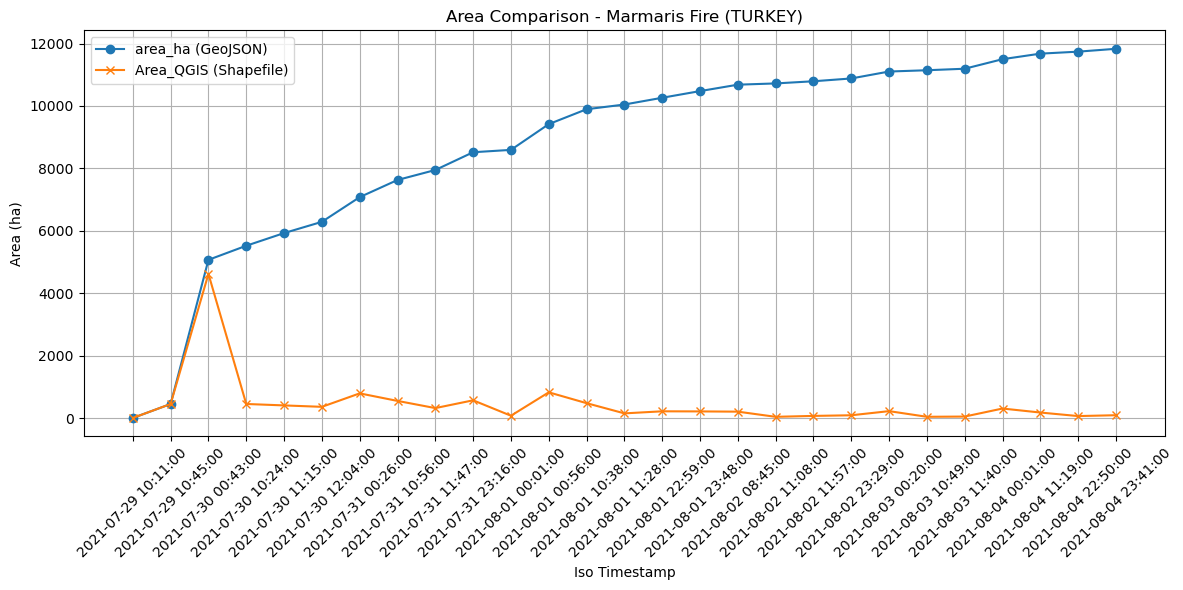

In [4]:
### MARMARIS
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

gdf_shp = gpd.read_file("/home/polivera/Documents/NERO - Database/Turkiye/Mugla_Marmaris/progression_marmaris_29072021.shp")
gdf_json = gpd.read_file("/home/polivera/Documents/NERO - Database/Clear GeoJSONs/turket_202107_marmaris_v1.geojson")

# COnvert to string to not have problems with "nan"
gdf_shp['date_hour'] = gdf_shp['date_hour'].astype(str)
gdf_json['iso_timestamp'] = gdf_json['iso_timestamp'].astype(str)

# Select columns
df_shp = gdf_shp[['date_hour', 'Area_QGIS']]
df_json = gdf_json[['iso_timestamp', 'area_ha']]

df_shp['Area_QGIS'] = df_shp['Area_QGIS'].astype(str).str.replace(',', '.').astype(float)
df_json['area_ha'] = df_json['area_ha'].astype(str).str.replace(',', '.').astype(float)

# Filter for the "nan"
df_shp = df_shp[df_shp['date_hour'].notna() & (df_shp['date_hour'] != 'nan')]
df_json = df_json[df_json['iso_timestamp'].notna() & (df_json['iso_timestamp'] != 'nan')]

# Convert dates 
df_shp['date_hour'] = pd.to_datetime(df_shp['date_hour'], errors='coerce')
df_json['iso_timestamp'] = pd.to_datetime(df_json['iso_timestamp'], errors='coerce')

# Drop tiles for the "nan"
df_shp = df_shp.dropna(subset=['date_hour'])
df_json = df_json.dropna(subset=['iso_timestamp'])

# Group areas for dates 
df_shp_grouped = df_shp.groupby('date_hour', as_index=False)['Area_QGIS'].sum()
df_json_grouped = df_json.groupby('iso_timestamp', as_index=False)['area_ha'].sum()

df_shp = df_shp.drop_duplicates(['date_hour', 'Area_QGIS'])
df_json = df_json.drop_duplicates(['iso_timestamp', 'area_ha'])



# Merge the dates
df_merged = pd.merge(df_shp_grouped, df_json_grouped, left_on='date_hour', right_on='iso_timestamp', how='inner')

# Calculate mean differences 
df_merged['diference'] = df_merged['Area_QGIS'] - df_merged['area_ha']
mean_diferencias = df_merged['diference'].mean()
print("Mean difference", mean_diferencias)

# Order by date
df_merged = df_merged.sort_values(by='date_hour')

# Graph
plt.figure(figsize=(12,6))
posiciones = list(range(len(df_merged)))

plt.plot(posiciones, df_merged['area_ha'], marker='o', label='area_ha (GeoJSON)')
plt.plot(posiciones, df_merged['Area_QGIS'], marker='x', label='Area_QGIS (Shapefile)')

plt.xlabel('Iso Timestamp')
plt.ylabel('Area (ha)')
plt.title('Area Comparison - Marmaris Fire (TURKEY)')
plt.legend()
plt.grid()

fechas = df_merged['date_hour'].dt.strftime('%Y-%m-%d %H:%M:%S').tolist()
plt.xticks(ticks=posiciones, labels=fechas, rotation=45)

plt.tight_layout()
plt.show()


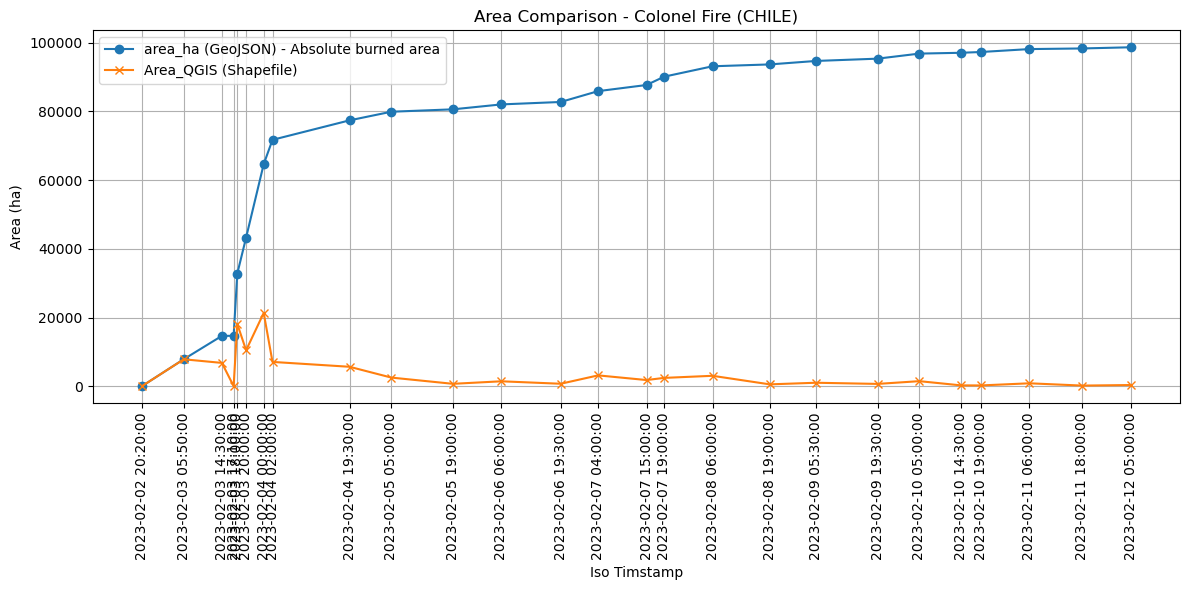

In [3]:
##### COLONEL 

##### 
import geopandas as gpd
import pandas as pd

# Lee el shapefile
gdf_shp = gpd.read_file("/home/polivera/Documents/NERO - Database/Chile/ColonelFires/Progression_ColonelFire_UTC.shp")

# Lee el GeoJSON
gdf_json = gpd.read_file("/home/polivera/Documents/NERO - Database/Clear GeoJSONs/chile_202302_colonel_v1.geojson")


# Convertir ambos atributos a datetime (errors='coerce' convierte 'uncertain'/'nan' en NaT en vez de fallar)
gdf_shp['date_hour'] = pd.to_datetime(gdf_shp['date_hour'], errors='coerce')
gdf_json['iso_timestamp'] = pd.to_datetime(gdf_json['iso_timestamp'], errors='coerce')

# Crear copias filtradas SOLO para los cálculos (así no eliminamos filas con NaN en áreas)
gdf_shp_f = gdf_shp[gdf_shp['date_hour'].notna()]
gdf_json_f = gdf_json[gdf_json['iso_timestamp'].notna()]

# Seleccionar columnas relevantes (usar las copias filtradas)
df_shp = gdf_shp_f[['date_hour', 'Area_QGIS']]
df_json = gdf_json_f[['iso_timestamp', 'area_ha']]

# Agrupar áreas por fecha/hora y sumar los valores
df_shp_grouped = df_shp.groupby('date_hour', as_index=False)['Area_QGIS'].sum()
df_json_grouped = df_json.groupby('iso_timestamp', as_index=False)['area_ha'].sum()

# Realizar el merge por la columna de fecha/hora
df_merged = pd.merge(
    df_shp_grouped,
    df_json_grouped,
    left_on='date_hour',
    right_on='iso_timestamp',
    how='inner'
)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))


# Convierte 'date_hour' a datetime si no lo has hecho antes
df_merged['date_hour'] = pd.to_datetime(df_merged['date_hour'], errors='coerce')

plt.plot(df_merged['date_hour'], df_merged['area_ha'], marker='o', label='area_ha (GeoJSON) - Absolute burned area')
plt.plot(df_merged['date_hour'], df_merged['Area_QGIS'], marker='x', label='Area_QGIS (Shapefile)')

plt.xlabel('Iso Timstamp')
plt.ylabel('Area (ha)')
plt.title('Area Comparison - Colonel Fire (CHILE)')
plt.legend()
plt.grid()

# Fuerza los ticks en cada fecha de tus datos
plt.xticks(df_merged['date_hour'], df_merged['date_hour'].dt.strftime('%Y-%m-%d %H:%M:%S'), rotation=90)

plt.tight_layout()
plt.show()






Media de diferencias: -103234.23650115034


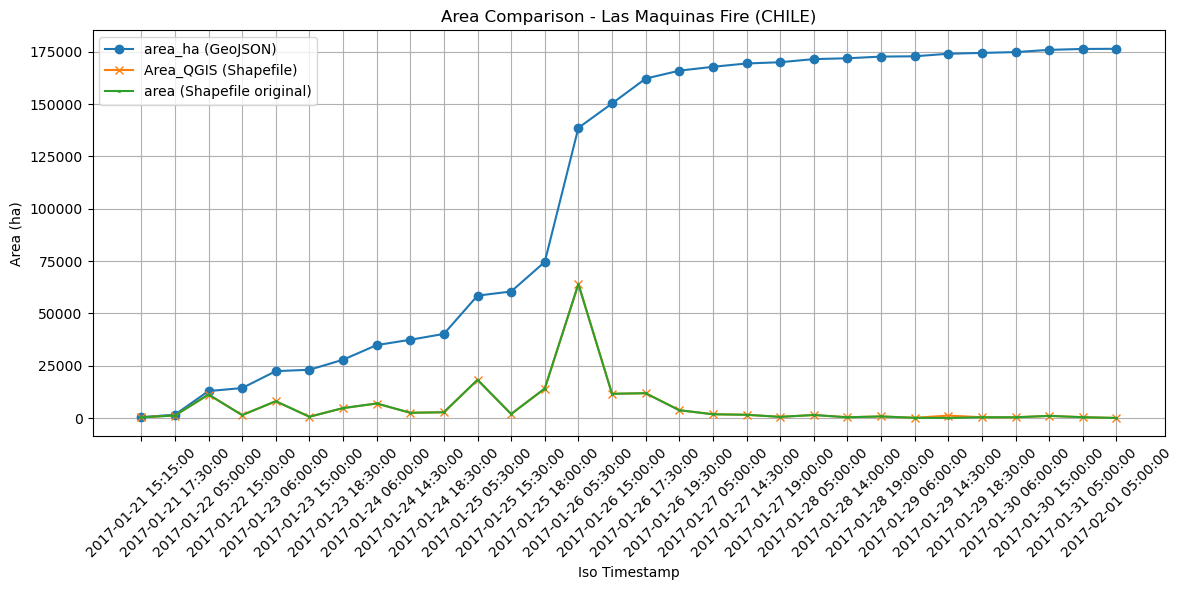

In [2]:
##### LAS MAQUINAS

import geopandas as gpd
import pandas as pd

# Lee el shapefile
gdf_shp = gpd.read_file("/home/polivera/Documents/NERO - Database/Chile/Las_Maquinas/Progression_Las_Maquinas_UTM19S.shp")

# Lee el GeoJSON
gdf_json = gpd.read_file("/home/polivera/Documents/NERO - Database/Clear GeoJSONs/chile_201701_lasmaquinas_v1.geojson")


# Convertir ambos atributos a datetime (errors='coerce' convierte 'uncertain'/'nan' en NaT en vez de fallar)
gdf_shp['date_hour'] = pd.to_datetime(gdf_shp['date_hour'], errors='coerce')
gdf_json['iso_timestamp'] = pd.to_datetime(gdf_json['iso_timestamp'], errors='coerce')

# Crear copias filtradas SOLO para los cálculos (así no eliminamos filas con NaN en áreas)
gdf_shp_f = gdf_shp[gdf_shp['date_hour'].notna()]
gdf_json_f = gdf_json[gdf_json['iso_timestamp'].notna()]

# Seleccionar columnas relevantes (usar las copias filtradas)
# Incluir 'area' si existe en el shapefile original
shp_cols = ['date_hour', 'Area_QGIS']
if 'area' in gdf_shp_f.columns:
    shp_cols.append('area')   # añadimos la columna 'area' para agrupar/plotear
else:
    print("Aviso: la columna 'area' no existe en el shapefile. No se añadirá esa serie al gráfico.")

df_shp = gdf_shp_f[shp_cols]
df_json = gdf_json_f[['iso_timestamp', 'area_ha']]

# Agrupar áreas por fecha/hora y sumar los valores
df_shp_grouped = df_shp.groupby('date_hour', as_index=False).sum()
df_json_grouped = df_json.groupby('iso_timestamp', as_index=False)['area_ha'].sum()

# Realizar el merge por la columna de fecha/hora
df_merged = pd.merge(
    df_shp_grouped,
    df_json_grouped,
    left_on='date_hour',
    right_on='iso_timestamp',
    how='inner'
)

# Ahora puedes calcular la diferencia y la media de diferencias
df_merged['diferencia'] = df_merged['Area_QGIS'] - df_merged['area_ha']
media_diferencias = df_merged['diferencia'].mean()
print("Media de diferencias:", media_diferencias)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

# Posiciones numéricas equiespaciadas para X
posiciones = list(range(len(df_merged)))

# Ploteo de las series existentes
plt.plot(posiciones, df_merged['area_ha'], marker='o', label='area_ha (GeoJSON)')
plt.plot(posiciones, df_merged['Area_QGIS'], marker='x', label='Area_QGIS (Shapefile)')

# Si existe la columna 'area' en el DataFrame agrupado, añadirla al gráfico
plt.plot(posiciones, df_merged['area'], marker='s', markersize=2, markeredgewidth=0.4, label='area (Shapefile original)')


plt.xlabel('Iso Timestamp')
plt.ylabel('Area (ha)')
plt.title('Area Comparison - Las Maquinas Fire (CHILE)')
plt.legend()
plt.grid()

# Formatear etiquetas del eje X con fechas, usando las posiciones equiespaciadas
fechas = df_merged['date_hour'].dt.strftime('%Y-%m-%d %H:%M:%S').tolist()
plt.xticks(ticks=posiciones, labels=fechas, rotation=45)

plt.tight_layout()
plt.show()


Media de diferencias: -3222.4554332565212


/tmp/ipykernel_1280433/2171306213.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdf_shp['utc_date'] = pd.to_datetime(gdf_shp['utc_date'], errors='coerce')


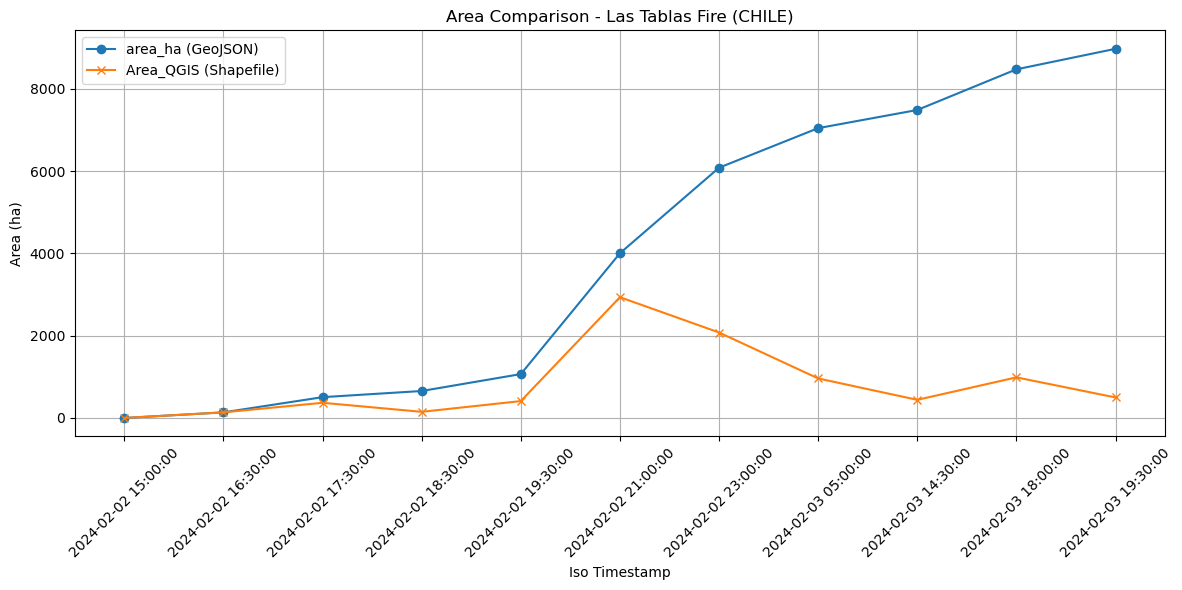

In [3]:
#### LAS TABLAS

import geopandas as gpd
import pandas as pd

# Lee el shapefile
gdf_shp = gpd.read_file("/home/polivera/Documents/NERO - Database/Chile/LasTablas_Fire/Progressoes_LasTablas_v3_COM_GOES.shp")

# Lee el GeoJSON
gdf_json = gpd.read_file("/home/polivera/Documents/NERO - Database/Clear GeoJSONs/chile_202402_lastablas_v1.geojson")


# Convertir ambos atributos a datetime (errors='coerce' convierte 'uncertain'/'nan' en NaT en vez de fallar)
gdf_shp['utc_date'] = pd.to_datetime(gdf_shp['utc_date'], errors='coerce')
gdf_json['iso_timestamp'] = pd.to_datetime(gdf_json['iso_timestamp'], errors='coerce')

# Crear copias filtradas SOLO para los cálculos (así no eliminamos filas con NaN en áreas)
gdf_shp_f = gdf_shp[gdf_shp['utc_date'].notna()]
gdf_json_f = gdf_json[gdf_json['iso_timestamp'].notna()]

# Seleccionar columnas relevantes (usar las copias filtradas)
# Incluir 'area_ha' si existe en el shapefile original
shp_cols = ['utc_date', 'Area_QGIS']

df_shp = gdf_shp_f[shp_cols]
df_json = gdf_json_f[['iso_timestamp', 'area_ha']]

# Agrupar áreas por fecha/hora y sumar los valores
df_shp_grouped = df_shp.groupby('utc_date', as_index=False).sum()
df_json_grouped = df_json.groupby('iso_timestamp', as_index=False)['area_ha'].sum()

# Realizar el merge por la columna de fecha/hora
df_merged = pd.merge(
    df_shp_grouped,
    df_json_grouped,
    left_on='utc_date',
    right_on='iso_timestamp',
    how='inner'
)


# Ahora puedes calcular la diferencia y la media de diferencias
# Usamos la columna 'area_ha' del GeoJSON y 'Area_QGIS' del shapefile
df_merged['diferencia'] = df_merged['Area_QGIS'] - df_merged['area_ha']
media_diferencias = df_merged['diferencia'].mean()
print("Media de diferencias:", media_diferencias)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

# Posiciones numéricas equiespaciadas para X
posiciones = list(range(len(df_merged)))

# Ploteo de las series existentes
plt.plot(posiciones, df_merged['area_ha'], marker='o', label='area_ha (GeoJSON)')
plt.plot(posiciones, df_merged['Area_QGIS'], marker='x', label='Area_QGIS (Shapefile)')

plt.xlabel('Iso Timestamp')
plt.ylabel('Area (ha)')
plt.title('Area Comparison - Las Tablas Fire (CHILE)')
plt.legend()
plt.grid()

fechas = df_merged['utc_date'].dt.strftime('%Y-%m-%d %H:%M:%S').tolist()
plt.xticks(ticks=posiciones, labels=fechas, rotation=45)

plt.tight_layout()
plt.show()


Media de diferencias: 0.0041547418071282705


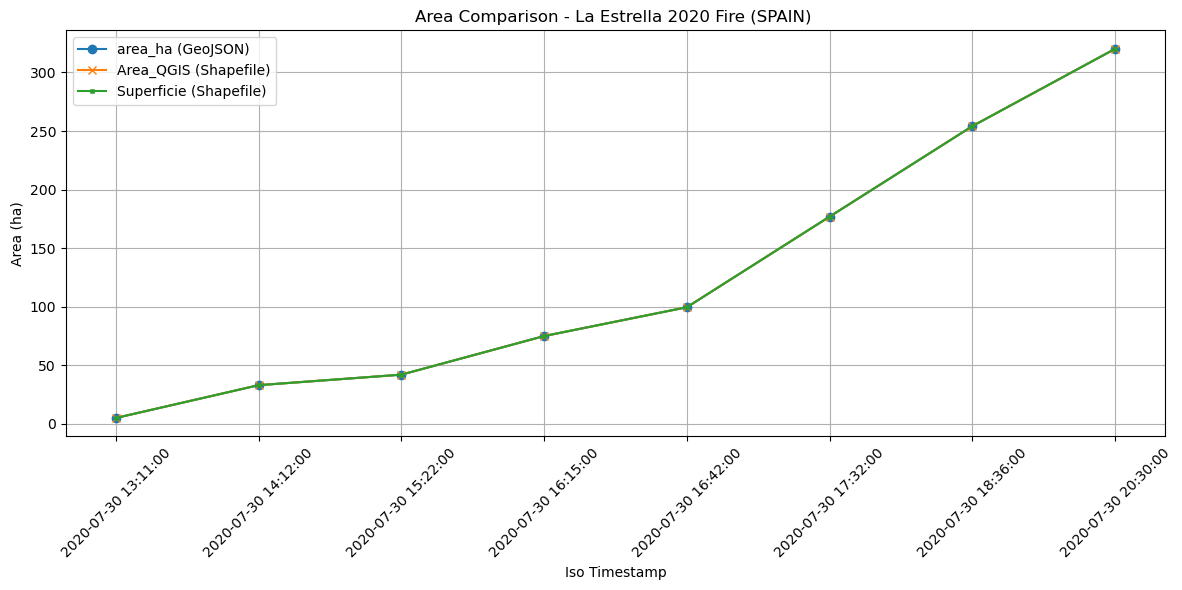

In [30]:
#### LA ESTRELLA 2020 

import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import re

# Lee el shapefile
gdf_shp = gpd.read_file("/home/polivera/Documents/NERO - Database/Spain/La_Estrella_2020/Isochrones/Isochrones.shp")

# Lee el GeoJSON
gdf_json = gpd.read_file("/home/polivera/Documents/NERO - Database/Reviews GeoJSONs/LaEstrella2020Fire_new1.geojson")

#import re
import matplotlib.pyplot as plt
import pandas as pd

# --- función que extrae fecha y hora desde 'fecha' y 'Descripcio' ---
def crear_iso_timestamp(row):
    # Extract date from 'fecha' and format 30072020 → 2020-07-30
    date_str = str(row.get('fecha', ''))
    if len(date_str) == 8 and date_str.isdigit():
        date_fmt = f"{date_str[4:8]}-{date_str[2:4]}-{date_str[0:2]}"
    else:
        date_fmt = ''
    # Extract hour from 'Descripcio'
    descripcio_str = str(row.get('Descripcio', ''))
    m = re.search(r'_(\d{4})$', descripcio_str)
    if m:
        hour_fmt = f"{m.group(1)[0:2]}:{m.group(1)[2:4]}"
    else:
        hour_fmt = ''
    # Combine date and hour
    if date_fmt and hour_fmt:
        return f"{date_fmt} {hour_fmt}"
    else:
        return ''

# --- Crear date_hour a partir de 'fecha' y 'Descripcio' en el shapefile ---
# (suponiendo que gdf_shp ya está cargado)
gdf_shp['date_hour'] = gdf_shp.apply(crear_iso_timestamp, axis=1)

# Convertir a datetime (no fallará si hay valores no parseables)
gdf_shp['date_hour'] = pd.to_datetime(gdf_shp['date_hour'], errors='coerce')

# (Si aún no lo has hecho) convertir iso_timestamp del GeoJSON a datetime
gdf_json['iso_timestamp'] = pd.to_datetime(gdf_json['iso_timestamp'], errors='coerce')

# --- Mantener tu lógica: convertir comas a puntos y a float ---
df_shp = gdf_shp.copy()
df_json = gdf_json.copy()

df_shp['Area_QGIS'] = df_shp['Area_QGIS'].astype(str).str.replace(',', '.').astype(float)
df_json['area_ha'] = df_json['area_ha'].astype(str).str.replace(',', '.').astype(float)

# Si quieres añadir 'Superficie' (opcional)
if 'Superficie' in df_shp.columns:
    df_shp['Superficie'] = df_shp['Superficie'].astype(str).str.replace(',', '.').astype(float)

# --- Filtrar filas con date_hour válido en el shapefile (opcional para los cálculos) ---
df_shp = df_shp[df_shp['date_hour'].notna()]
df_json = df_json[df_json['iso_timestamp'].notna()]

# Agrupar áreas por fecha/hora y sumar los valores
group_cols = ['Area_QGIS']
if 'Superficie' in df_shp.columns:
    group_cols.append('Superficie')

df_shp_grouped = df_shp.groupby('date_hour', as_index=False)[group_cols].sum()
df_json_grouped = df_json.groupby('iso_timestamp', as_index=False)['area_ha'].sum()

# Realizar el merge por la columna de fecha/hora (ahora coincide la fecha creada con iso_timestamp)
df_merged = pd.merge(
    df_shp_grouped,
    df_json_grouped,
    left_on='date_hour',
    right_on='iso_timestamp',
    how='inner'
)

# Calcular diferencia y media
df_merged['diferencia'] = df_merged['Area_QGIS'] - df_merged['area_ha']
media_diferencias = df_merged['diferencia'].mean()
print("Media de diferencias:", media_diferencias)

df_merged = df_merged.sort_values(by='date_hour')

# --- Gráfico ---
plt.figure(figsize=(12,6))
posiciones = list(range(len(df_merged)))

plt.plot(posiciones, df_merged['area_ha'], marker='o', label='area_ha (GeoJSON)')
plt.plot(posiciones, df_merged['Area_QGIS'], marker='x', label='Area_QGIS (Shapefile)')

# Añadir 'Superficie' si existe
if 'Superficie' in df_merged.columns:
    plt.plot(posiciones, df_merged['Superficie'], marker='s', markersize=3, markeredgewidth=0.4, label='Superficie (Shapefile)')

plt.xlabel('Iso Timestamp')
plt.ylabel('Area (ha)')
plt.title('Area Comparison - La Estrella 2020 Fire (SPAIN) ')
plt.legend()
plt.grid()

fechas = df_merged['date_hour'].dt.strftime('%Y-%m-%d %H:%M:%S').tolist()
plt.xticks(ticks=posiciones, labels=fechas, rotation=45)

plt.tight_layout()
plt.show()


Media de diferencias: 0.011519137763346978


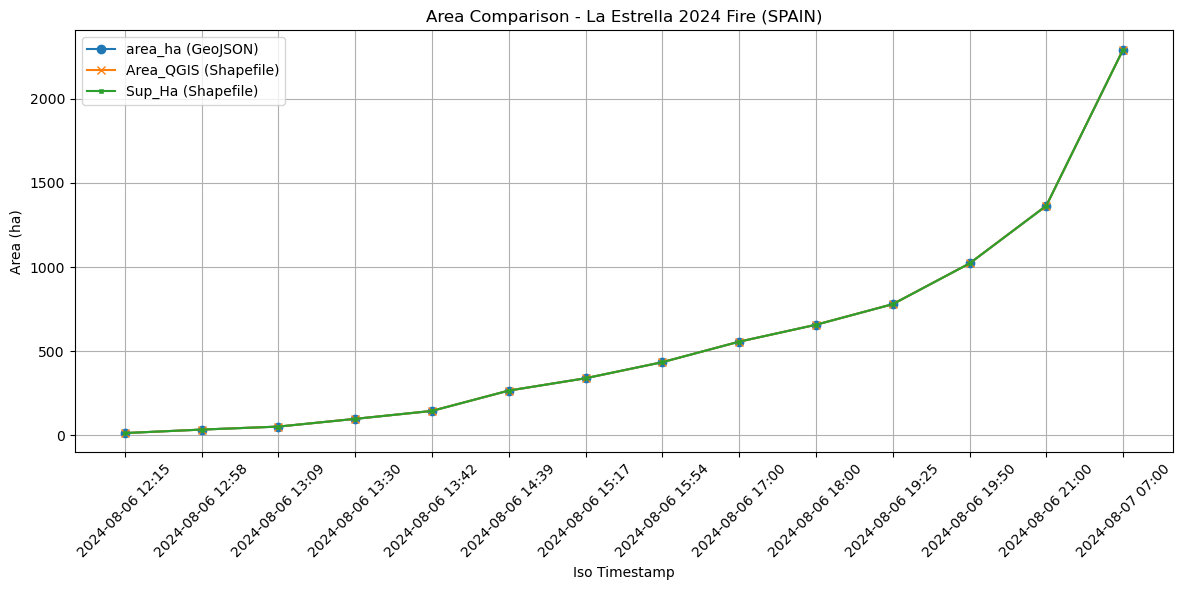

In [37]:
#### LA ESTRELLA 2024 
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Lee el shapefile
gdf_shp = gpd.read_file("/home/polivera/Documents/NERO - Database/Spain/La_Estrella_2024/Isochrones/Isochrones.shp")

# Lee el GeoJSON
gdf_json = gpd.read_file("/home/polivera/Documents/NERO - Database/Reviews GeoJSONs/LaEstrella2024Fire_new1.geojson")

# Convertir 'Fecha_Hora' a 'iso_timestamp' en el shapefile
gdf_shp['iso_timestamp'] = pd.to_datetime(
    gdf_shp['Fecha_Hora'], 
    format='%Y%m%d_%H%M',
    errors='coerce'
).dt.strftime('%Y-%m-%d %H:%M')

# Convertir 'iso_timestamp' a datetime en ambos DataFrames
gdf_shp['iso_timestamp'] = pd.to_datetime(gdf_shp['iso_timestamp'], errors='coerce')
gdf_json['iso_timestamp'] = pd.to_datetime(gdf_json['iso_timestamp'], errors='coerce')

# Conversión de área
gdf_shp['Area_QGIS'] = gdf_shp['Area_QGIS'].astype(str).str.replace(',', '.').astype(float)
gdf_json['area_ha'] = gdf_json['area_ha'].astype(str).str.replace(',', '.').astype(float)

# Solo convertir y graficar Sup_ha si existe
use_sup_ha = 'Sup_Ha' in gdf_shp.columns
if use_sup_ha:
    gdf_shp['Sup_Ha'] = gdf_shp['Sup_Ha'].astype(str).str.replace(',', '.').astype(float)

# Selección columnas principales
usecols = ['iso_timestamp', 'Area_QGIS']
if use_sup_ha:
    usecols.append('Sup_Ha')
df_shp = gdf_shp[usecols].dropna(subset=['iso_timestamp'])
df_json = gdf_json[['iso_timestamp', 'area_ha']].dropna(subset=['iso_timestamp'])

# Agrupar
group_cols = ['Area_QGIS']
if use_sup_ha:
    group_cols.append('Sup_Ha')
df_shp_grouped = df_shp.groupby('iso_timestamp', as_index=False)[group_cols].sum()
df_json_grouped = df_json.groupby('iso_timestamp', as_index=False)['area_ha'].sum()

# Merge
df_merged = pd.merge(
    df_shp_grouped,
    df_json_grouped,
    on='iso_timestamp',
    how='inner'
)

df_merged['diferencia'] = df_merged['Area_QGIS'] - df_merged['area_ha']
media_diferencias = df_merged['diferencia'].mean()
print("Media de diferencias:", media_diferencias)

df_merged = df_merged.sort_values(by='iso_timestamp')
posiciones = list(range(len(df_merged)))

plt.figure(figsize=(12,6))
plt.plot(posiciones, df_merged['area_ha'], marker='o', label='area_ha (GeoJSON)')
plt.plot(posiciones, df_merged['Area_QGIS'], marker='x', label='Area_QGIS (Shapefile)')
if use_sup_ha:
    plt.plot(posiciones, df_merged['Sup_Ha'], marker='s', markersize=3, markeredgewidth=0.4, label='Sup_Ha (Shapefile)')

plt.xlabel('Iso Timestamp')
plt.ylabel('Area (ha)')
plt.title('Area Comparison - La Estrella 2024 Fire (SPAIN)')
plt.legend()
plt.grid()

fechas = df_merged['iso_timestamp'].dt.strftime('%Y-%m-%d %H:%M').tolist()
plt.xticks(ticks=posiciones, labels=fechas, rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#### SANTA CRUZ MUDELA 
